In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Admission_Predict_dataset.csv')

In [3]:
df.drop("Serial No.", axis=1, inplace=True)

In [4]:
df = df.rename(columns={'GRE Score': 'GRE', 'TOEFL Score': 'TOEFL', 'LOR': 'LOR', 'Chance of Admit': 'Probability' })

In [5]:
df.head()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


In [6]:
df.shape

(500, 8)

In [7]:
df.tail()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
495,332.0,108.0,5.0,4.5,4.0,9.02,1.0,0.87
496,337.0,117.0,5.0,5.0,5.0,9.87,1.0,0.96
497,330.0,120.0,5.0,4.5,5.0,9.56,1.0,0.93
498,312.0,103.0,4.0,4.0,5.0,8.43,0.0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0.0,0.84


In [8]:
df.columns

Index(['GRE', 'TOEFL', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research',
       'Probability'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE                492 non-null    float64
 1   TOEFL              491 non-null    float64
 2   University Rating  493 non-null    float64
 3   SOP                497 non-null    float64
 4   LOR                493 non-null    float64
 5   CGPA               495 non-null    float64
 6   Research           496 non-null    float64
 7   Probability        493 non-null    float64
dtypes: float64(8)
memory usage: 31.4 KB


In [10]:
df.describe()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
count,492.000000,491.000000,493.000000,497.000000,493.000000,495.000000,496.000000,493.000000
mean,316.524390,107.187373,3.113590,3.377264,3.472617,8.578606,0.558468,0.722657
std,11.248961,6.107333,1.147318,0.989881,0.922153,0.603779,0.497071,0.141167
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.130000,0.000000,0.630000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,0.720000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [11]:
df.head()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


In [12]:
df.dtypes

GRE                  float64
TOEFL                float64
University Rating    float64
SOP                  float64
LOR                  float64
CGPA                 float64
Research             float64
Probability          float64
dtype: object

In [13]:
df.isnull().sum()

GRE                  8
TOEFL                9
University Rating    7
SOP                  3
LOR                  7
CGPA                 5
Research             4
Probability          7
dtype: int64

In [14]:
df.fillna(df.mean(), inplace=True)

Data Visualization

In [15]:
df.corr(method="pearson")

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
GRE,1.000000,0.808393,0.629125,0.599587,0.510184,0.807209,0.555506,0.793142
TOEFL,0.808393,1.000000,0.646776,0.631748,0.533274,0.803032,0.469705,0.780740
University Rating,0.629125,0.646776,1.000000,0.726316,0.608061,0.704367,0.425036,0.689013
SOP,0.599587,0.631748,0.726316,1.000000,0.656953,0.701218,0.406409,0.681390
LOR,0.510184,0.533274,0.608061,0.656953,1.000000,0.625896,0.367938,0.638323
CGPA,0.807209,0.803032,0.704367,0.701218,0.625896,1.000000,0.498830,0.865315
Research,0.555506,0.469705,0.425036,0.406409,0.367938,0.498830,1.000000,0.539748
Probability,0.793142,0.780740,0.689013,0.681390,0.638323,0.865315,0.539748,1.000000


<AxesSubplot:>

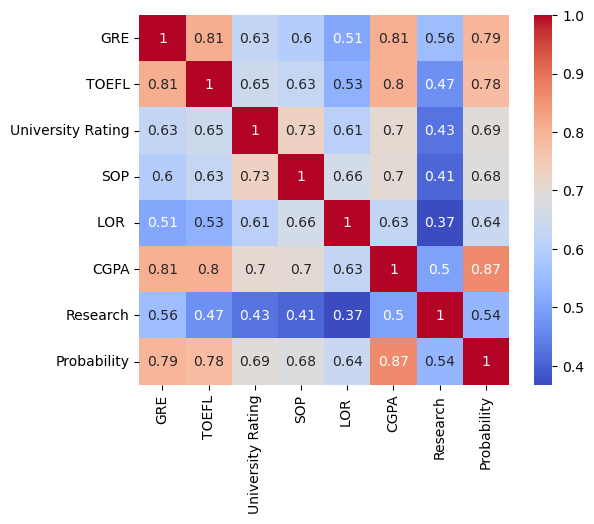

In [16]:
sns.heatmap(df.corr(method="pearson"), annot=True, cmap='coolwarm', square=True)

<AxesSubplot:xlabel='Research', ylabel='Probability'>

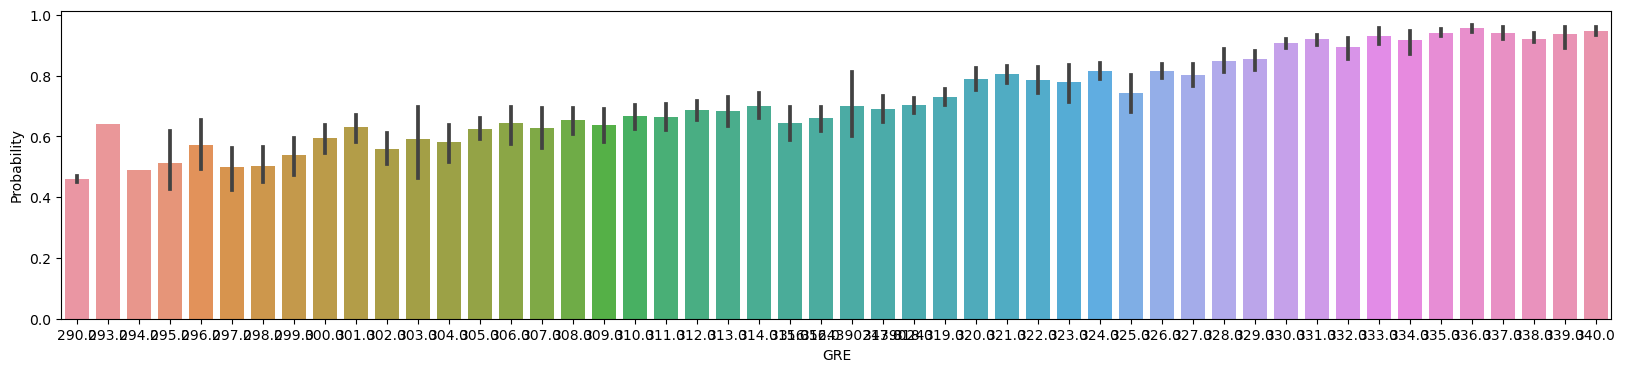

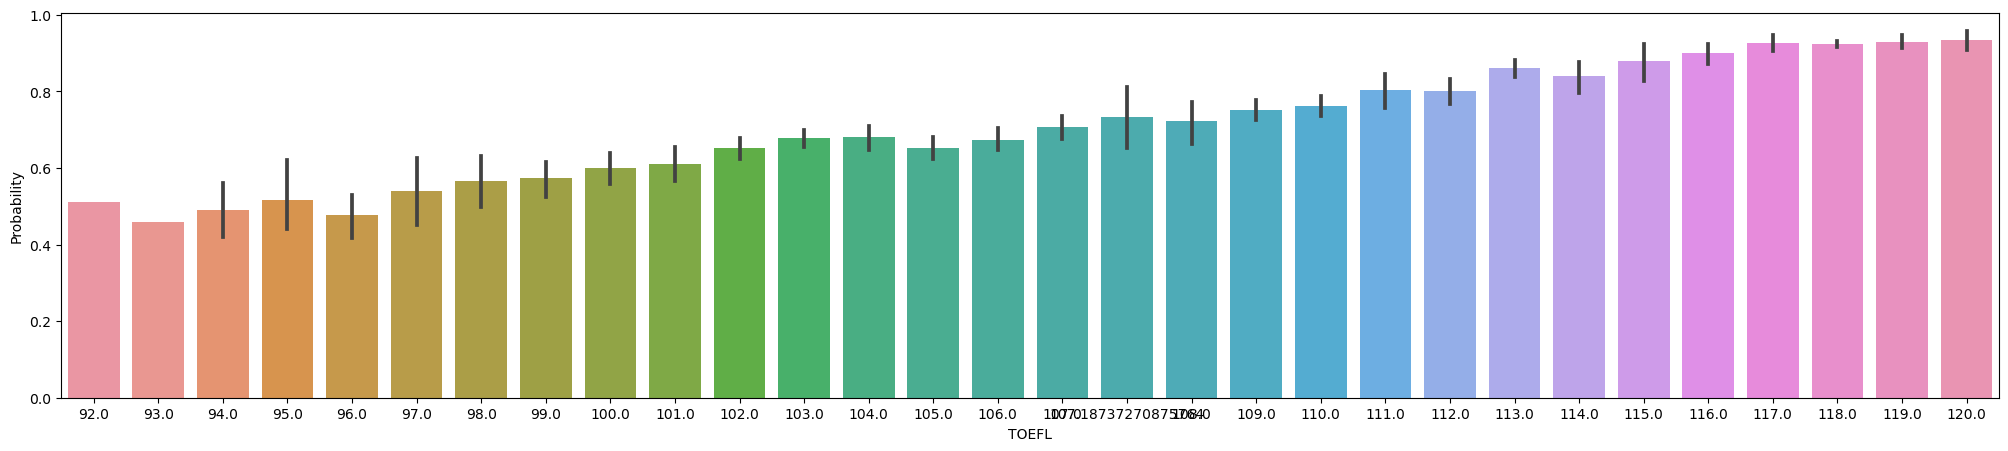

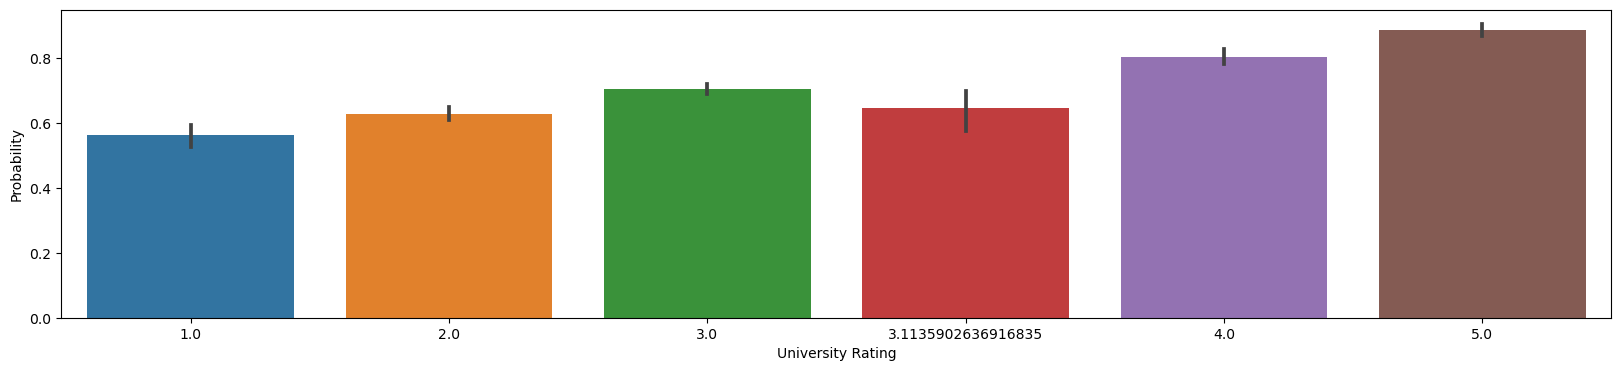

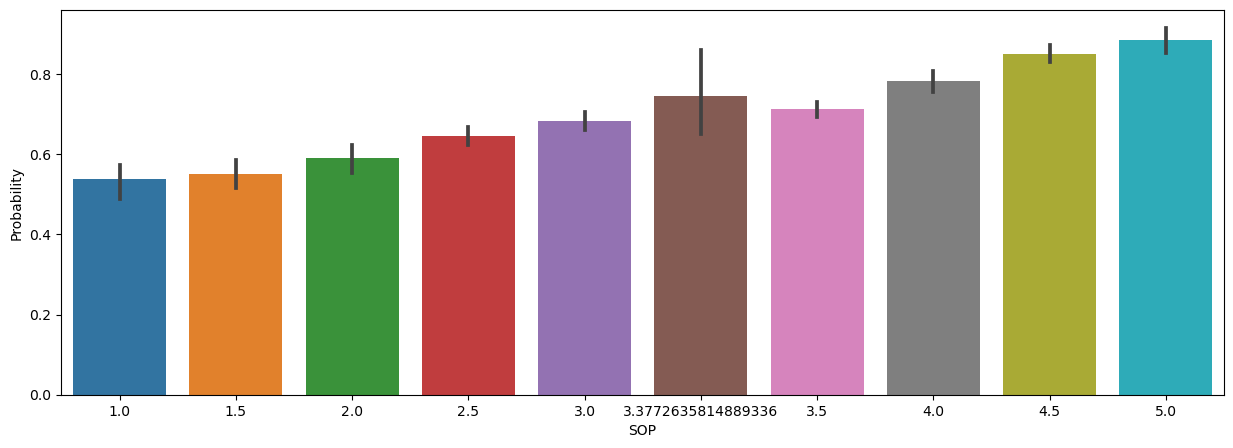

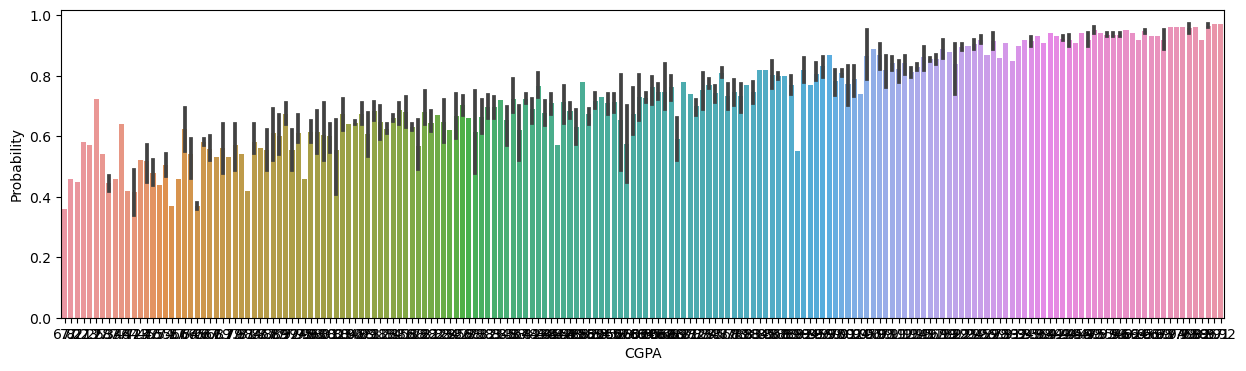

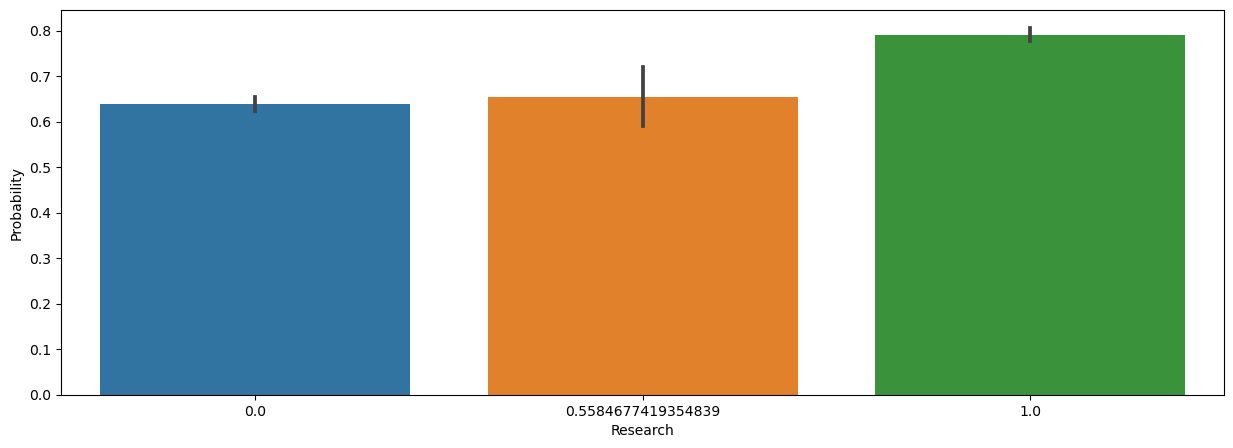

In [17]:
plt.subplots(figsize=(20,4))
sns.barplot(x="GRE",y="Probability",data=df)
plt.subplots(figsize=(25,5))
sns.barplot(x="TOEFL",y="Probability",data=df)
plt.subplots(figsize=(20,4))
sns.barplot(x="University Rating",y="Probability",data=df)
plt.subplots(figsize=(15,5))
sns.barplot(x="SOP",y="Probability",data=df)
plt.subplots(figsize=(15,4))
sns.barplot(x="CGPA",y="Probability",data=df)
plt.subplots(figsize=(15,5))
sns.barplot(x="Research",y="Probability",data=df)

In [18]:
df_copy = df.copy(deep=True)

Model Building

In [19]:
X = df_copy.drop('Probability', axis='columns')
y=df_copy['Probability']

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [23]:
# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {
                'normalize': [True,False]
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'parameters': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'svr': {
            'model': SVR(),
            'parameters': {
                'gamma': ['auto','scale']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        
        'random_forest': {
            'model': RandomForestRegressor(),
            'parameters': {
                'n_estimators': [5,10,25,30,50],
                'max_depth': [1,2,3,4,5],
                'max_features': ['sqrt', 'log2']
            }
        },
        
        'knn': {
            'model': KNeighborsRegressor(algorithm='auto'),
            'parameters': {
                'n_neighbors': [2,5,10,20]
            }
        }
    }
    scores = []
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=5, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])
        
find_best_model(X, y)

C:\Users\Mitixa Modi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Mitixa Modi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipel

,model,best_parameters,score
0,linear_regression,{'normalize': True},0.784571
1,lasso,"{'alpha': 1, 'selection': 'random'}",0.166034
2,svr,{'gamma': 'scale'},0.621873
3,decision_tree,"{'criterion': 'mse', 'splitter': 'best'}",0.500408
4,random_forest,"{'max_depth': 5, 'max_features': 'log2', 'n_es...",0.767382
5,knn,{'n_neighbors': 20},0.696321


In [24]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 101)

In [25]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (400, 7)
Training Labels Shape: (400,)
Testing Features Shape: (100, 7)
Testing Labels Shape: (100,)


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_features)
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)

In [27]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 30, max_depth = 5, max_features='log2', random_state = 101)
# Train the model on training data
rf.fit(train_features, train_labels);

In [28]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.05 degrees.


In [29]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 92.32 %.


In [30]:
train_features

array([[-1.63089629e+00, -1.31070904e+00, -1.83576861e+00, ...,
        -5.12966001e-01, -1.81957019e+00, -1.11349128e+00],
       [ 4.31771210e-01,  6.61209279e-01,  1.62562747e+00, ...,
         1.66052301e+00,  1.45431758e+00,  9.04842008e-01],
       [-1.66347681e-02, -3.24749880e-01, -1.05070573e-01, ...,
         3.04062516e-02,  2.69795373e-01, -1.11349128e+00],
       ...,
       [ 1.41826436e+00,  1.81149496e+00,  1.62562747e+00, ...,
         6.47527786e-04,  1.48722098e+00,  9.04842008e-01],
       [ 9.69858385e-01,  6.61209279e-01,  7.60278447e-01, ...,
         6.47527786e-04,  7.13991202e-01,  9.04842008e-01],
       [ 7.90495993e-01,  4.96882753e-01, -6.77534933e-03, ...,
         5.73778504e-01,  1.71085189e-01,  9.04842008e-01]])

In [31]:
train_labels

161    0.53
72     0.93
246    0.72
230    0.73
391    0.71
       ... 
63     0.56
326    0.63
337    0.94
11     0.84
351    0.73
Name: Probability, Length: 400, dtype: float64

In [32]:
print('Chance of getting into top ranked university(eg. UCLA) is {}%'.format(round(rf.predict([[325, 111, 4, 4.5, 4.5, 8.65, 0]])[0]*100, 3)))

Chance of getting into top ranked university(eg. UCLA) is 94.595%
